In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_tr = pd.read_csv("mini-project-III/twm_transactions.csv",sep=';')

In [3]:
df_tr

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


In [9]:
# drop all inquiries
df = df_tr[df_tr['tran_amt'] != 0]

In [10]:
df

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
5,32,13625032,-0.15,-0.15,0.0,2064.28,3.4.1995,0,,FK
6,60,13631642,-40.00,-40.00,0.0,737.03,17.1.1995,83649,A,WD
7,25,4561143213634590,-420.60,-420.60,0.0,-2142.46,14.12.1995,110142,E,CG
...,...,...,...,...,...,...,...,...,...,...
77574,1,4561143213629730,-223.35,-223.35,0.0,-223.35,4.2.1995,25421,E,CG
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD


In [12]:
# select columns to keep for analysis
df_transactions = df[['acct_nbr','tran_amt','new_balance']]

In [14]:
df_transactions.sort_values('acct_nbr')

,acct_nbr,tran_amt,new_balance
40740,13624802,-27.85,27.85
69300,13624802,-23.42,23.41
48709,13624802,-17.16,17.16
18122,13624802,-0.15,48.86
31186,13624802,-0.15,378.87
...,...,...,...
3202,4561143213634920,-1301.88,-5173.36
69492,4561143213634920,656.32,-5906.86
27594,4561143213634920,-635.13,-7100.00
15451,4561143213634920,-635.96,-5789.69


In [32]:
df_count = df_transactions.groupby('acct_nbr').tran_amt.count()

In [35]:
df_count.shape

(1397,)

In [27]:
df_accounts = pd.read_csv("mini-project-III/twm_accounts.csv", sep=';', index_col=0)

In [28]:
df_acct = df_accounts[df_accounts.account_active == 'Y ']

In [30]:
df_acct = df_acct[['starting_balance','ending_balance']]

In [36]:
df_acct.shape

(1266, 2)

In [33]:
df_merged = df_acct.merge(df_count, left_index=True, right_index=True)

In [38]:
df_merged.rename(columns={'tran_amt':'tran_count'})

,starting_balance,ending_balance,tran_count
acct_nbr,,,
13628063,1430.22,284.58,35
4561143213627090,266.34,496.15,52
4561143213628360,55.90,1000.00,36
13633112,11017.13,968.46,80
4561143213633610,849.37,462.28,43
...,...,...,...
13626022,428.90,626.79,85
4561143213626240,632.75,1400.00,49
4561143213628750,2810.91,3000.00,36


In [39]:
df_sum = df_transactions.groupby('acct_nbr').tran_amt.sum()

In [41]:
df_final = df_merged.merge(df_sum, left_index=True, right_index=True)

In [43]:
df_final.rename(columns={'tran_amt_x':'tran_count', 'tran_amt_y':'tran_sum'})

,starting_balance,ending_balance,tran_count,tran_sum
acct_nbr,,,,
13628063,1430.22,284.58,35,-1145.64
4561143213627090,266.34,496.15,52,-226.06
4561143213628360,55.90,1000.00,36,-814.41
13633112,11017.13,968.46,80,-10048.67
4561143213633610,849.37,462.28,43,399.05
...,...,...,...,...
13626022,428.90,626.79,85,197.89
4561143213626240,632.75,1400.00,49,-698.34
4561143213628750,2810.91,3000.00,36,190.84


In [44]:
sc=StandardScaler()
df_scaled=sc.fit_transform(df_final)

In [45]:
# use distortion plot to determine best number of clusters
%matplotlib inline
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

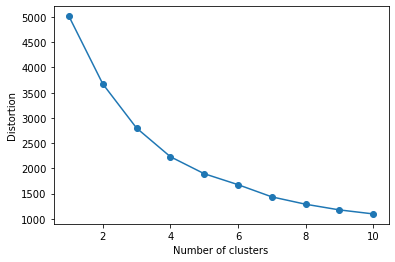

In [46]:
plot_distortion(df_scaled)

In [54]:
km = KMeans(n_clusters=4, n_init=20, random_state=12345)
y = km.fit_predict(df_scaled)

In [55]:
df_scaled = pd.DataFrame(df_scaled, columns = ['starting_balance', 'ending_balance', 'tran_count', 'tran_sum'])

In [56]:
df_scaled['cluster'] = y

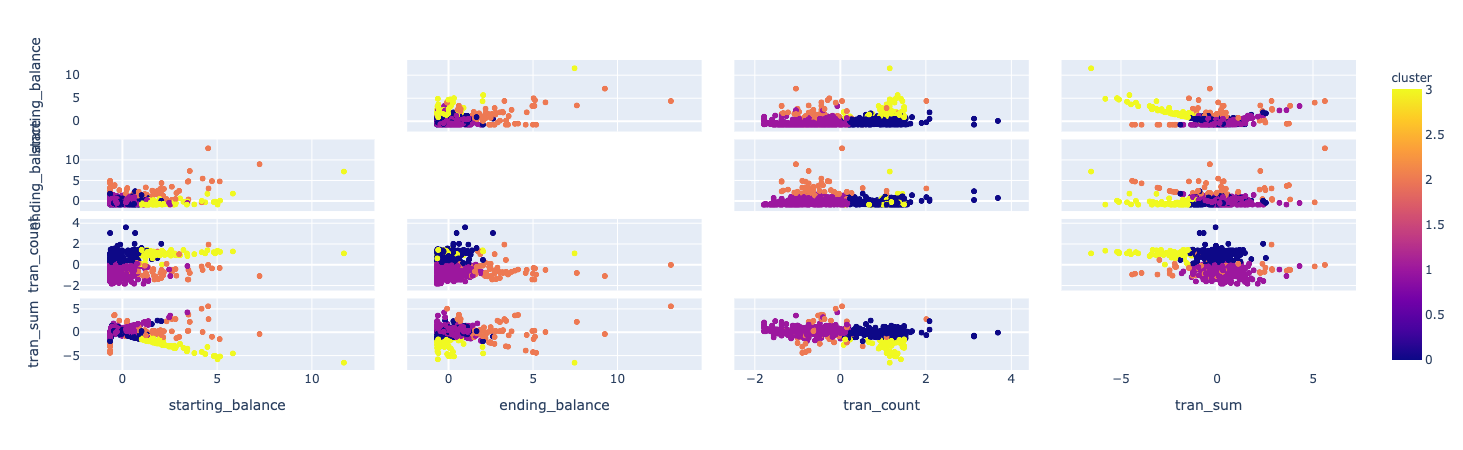

In [57]:
features = ['starting_balance', 'ending_balance', 'tran_count', 'tran_sum']
fig = px.scatter_matrix(
    df_scaled, 
    dimensions=features,
    color = 'cluster')
fig.update_traces(diagonal_visible=False)
fig.show()

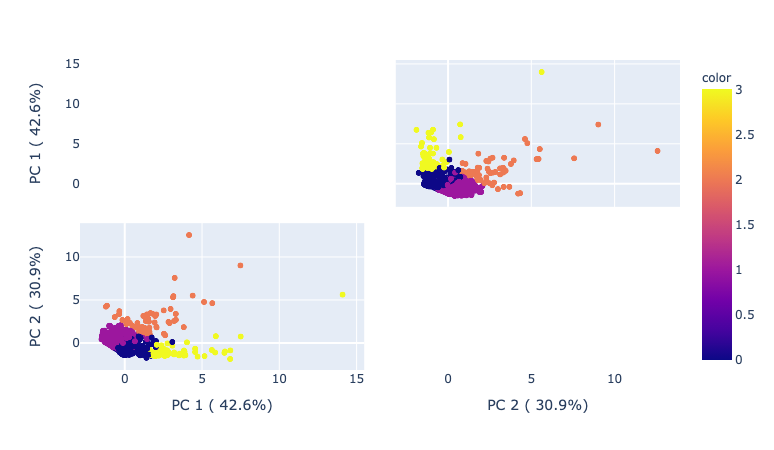

In [58]:
features = ['starting_balance', 'ending_balance', 'tran_count', 'tran_sum']

pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled[features])

labels ={
    str(i): f'PC {i+1} ( {var:.1f}%)'
    for i , var in enumerate(pca.explained_variance_ratio_* 100)
}

fig = px.scatter_matrix(components, 
                        labels = labels, 
                        dimensions= range(2),
                        color = df_scaled.cluster)
fig.update_traces(diagonal_visible=False)
fig.show()

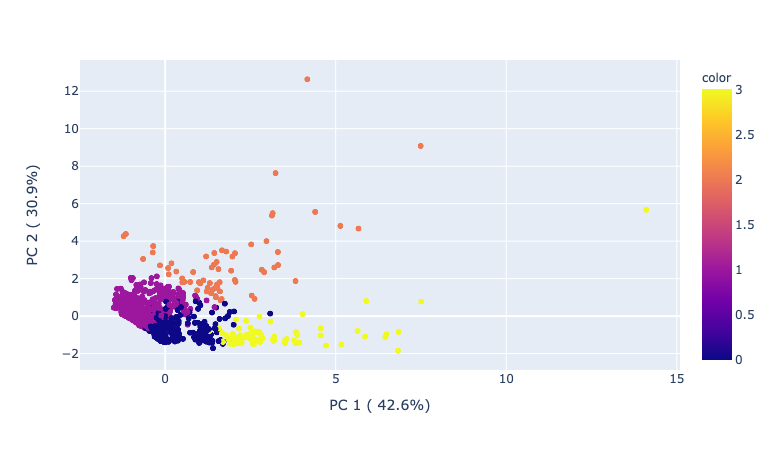

In [65]:
# PC1 vs PC2
fig = px.scatter(components, 
                labels = labels, 
                x=0,
                y=1,
                color = df_scaled.cluster)

fig.show()

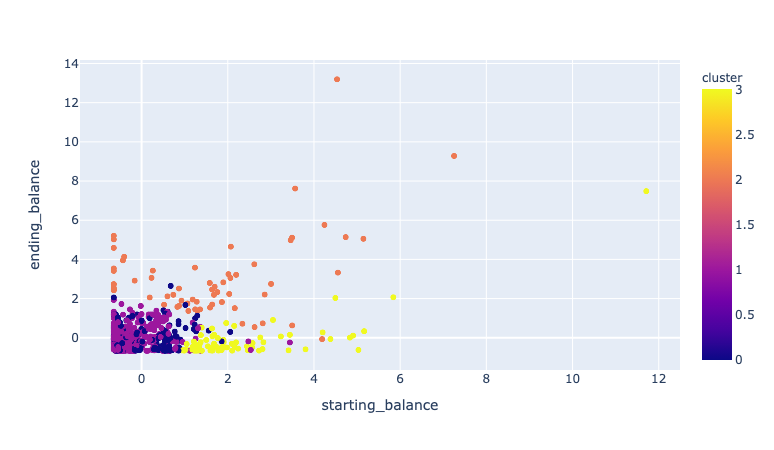

In [61]:
# Starting Balance vs Ending Balance
fig = px.scatter(
    df_scaled,
    x='starting_balance',
    y='ending_balance',
    color = 'cluster')

fig.show()